<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [197]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from metrics_regression import *

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [176]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

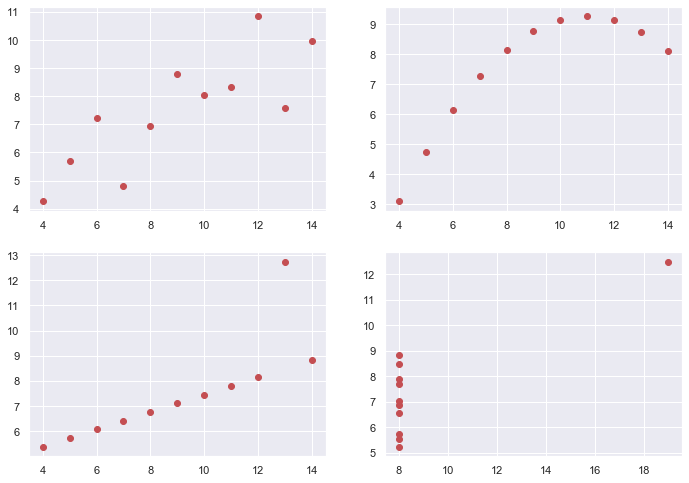

In [177]:
y1=pd.DataFrame(df.loc[(df['grupo']=='Grupo_1')]['y'])
x1=pd.DataFrame(df.loc[(df['grupo']=='Grupo_1')]['x'])
y2=pd.DataFrame(df.loc[(df['grupo']=='Grupo_2')]['y'])
x2=pd.DataFrame(df.loc[(df['grupo']=='Grupo_2')]['x'])
y3=pd.DataFrame(df.loc[(df['grupo']=='Grupo_3')]['y'])
x3=pd.DataFrame(df.loc[(df['grupo']=='Grupo_3')]['x'])
y4=pd.DataFrame(df.loc[(df['grupo']=='Grupo_4')]['y'])
x4=pd.DataFrame(df.loc[(df['grupo']=='Grupo_4')]['x'])
plt.subplot(221)
plt.scatter(x1, y1, color='r')
plt.subplot(222)
plt.scatter(x2, y2, color='r')
plt.subplot(223)
plt.scatter(x3, y3, color='r')
plt.subplot(224)
plt.scatter(x4, y4, color='r')

plt.show()

Se puede apreciar claramente que cada grupo se distribuye de manera notoramiente distinta.


2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [178]:
df.loc[(df['grupo']=='Grupo_1')].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [179]:
df.loc[(df['grupo']=='Grupo_2')].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [33]:
df.loc[(df['grupo']=='Grupo_3')].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [34]:
df.loc[(df['grupo']=='Grupo_4')].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

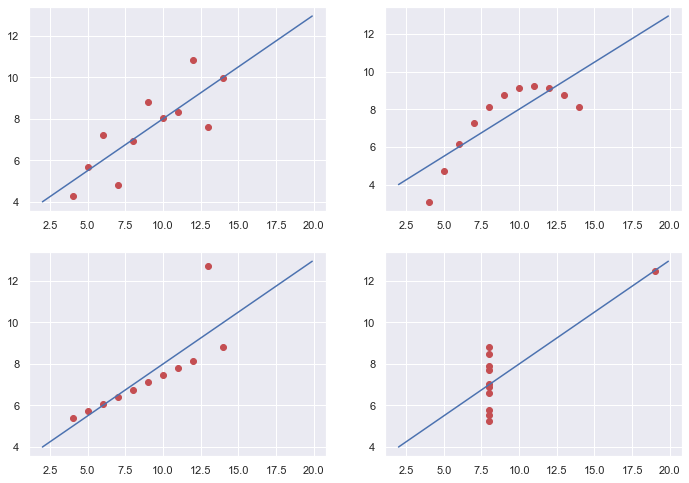

In [180]:
from sklearn.linear_model import LinearRegression
model_rl=LinearRegression()
model_rl.fit(x1, y1)
beta_0 = round(float(model_rl.intercept_),2)
beta_1 = round(float(model_rl.coef_[0]),2)
model_rl.fit(x2,y2)
beta_2 = round(float(model_rl.intercept_),2)
beta_3 = round(float(model_rl.coef_[0]),2)
model_rl.fit(x3, y3)
beta_4 = round(float(model_rl.intercept_),2)
beta_5 = round(float(model_rl.coef_[0]),2)
model_rl.fit(x4, y4)
beta_6 = round(float(model_rl.intercept_),2)
beta_7 = round(float(model_rl.coef_[0]),2)
plt.subplot(221)
plt.scatter(x1, y1, color='r')
x_range = np.arange(2,20,0.1)
plt.plot(x_range,beta_1*x_range+beta_0)
plt.subplot(222)
plt.scatter(x2, y2, color='r')
plt.plot(x_range,beta_3*x_range+beta_2)
plt.subplot(223)
plt.scatter(x3, y3, color='r')
plt.plot(x_range,beta_5*x_range+beta_4)
plt.subplot(224)
plt.scatter(x4, y4, color='r')
plt.plot(x_range,beta_7*x_range+beta_6)

plt.show()
plt.show()

4. Calcule los resultados de las métricas para cada grupo. Interprete.cb

In [185]:
from sklearn.metrics import r2_score
df_temp = pd.DataFrame(
    {
        'y': y1['y'],
        'yhat': list(model_rl.predict(x1).reshape(1,-1)[0])
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(float(r2_score(y1, model_rl.predict(x1))),4)
df_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.8373,1.2512,1.1185,0.1213,0.119,0.1116,0.1048,0.1167,0.6665


In [186]:
df_temp = pd.DataFrame(
    {
        'y':y2['y'],
        'yhat': list(model_rl.predict(x2).reshape(1,-1)[0])
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(float(r2_score(y2, model_rl.predict(x2))),4)
df_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.9679,1.2524,1.1191,0.157,0.1504,0.129,0.1315,0.1438,0.6662


In [187]:
df_temp = pd.DataFrame(
    {
        'y':y3['y'],
        'yhat': list(model_rl.predict(x3).reshape(1,-1)[0])
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(float(r2_score(y3, model_rl.predict(x3))),4)
df_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.7165,1.2506,1.1183,0.0798,0.0791,0.0955,0.0713,0.0815,0.6663


In [188]:
df_temp = pd.DataFrame(
    {
        'y':y4['y'],
        'yhat': list(model_rl.predict(x4).reshape(1,-1)[0])
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(float(r2_score(y4, model_rl.predict(x4))),4)
df_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.9027,1.2493,1.1177,0.1347,0.1324,0.1203,0.1167,0.1303,0.6667


5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.).

Para el grupo 2 claramante es mas llamativa una regrecion polinomial

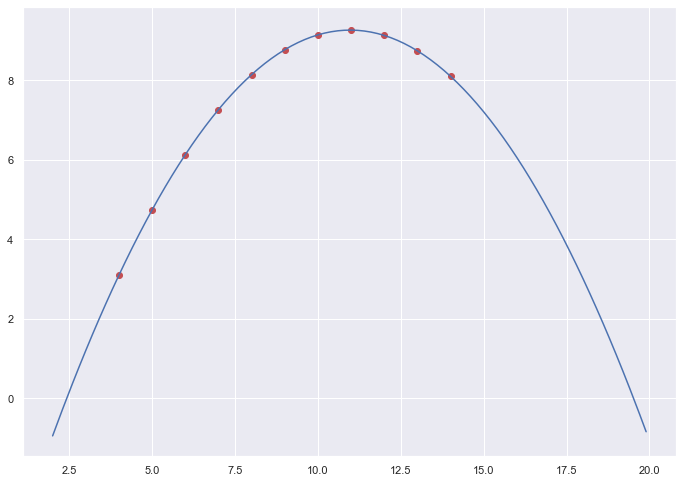

1.0

In [213]:
from sklearn.preprocessing import PolynomialFeatures
polynom=np.poly1d(np.polyfit(list(x2['x']),list(y2['y']),2))
x_s=np.arange(2,20,0.1)
plt.plot(x_s,polynom(x_s))
plt.scatter(x2, y2, color='r')
df_metrics['r2'] =  round(float(r2_score(y2, polynom(x2))),4)
plt.show()
df_metrics['r2'][0]

Ajusta perfecto


Por otro lado para el grupo 3 tenemos que existe  un dato un tanto atipico que genera una desviacion de la recta, para solucionar esto eliminaremos dicho punto y haremos denuevo la regresion. 